<a href="https://colab.research.google.com/github/Sashank11/learn_tensorflow/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is test notebook

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-13 12:18:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-03-13 12:18:05 (6.92 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



# Importing with pandas

In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = ["Date"], 
                 index_col = ["Date"]) # Telling pandas its a datatime type

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

# Visualizing

In [ ]:
# looking at the closing price for each day

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


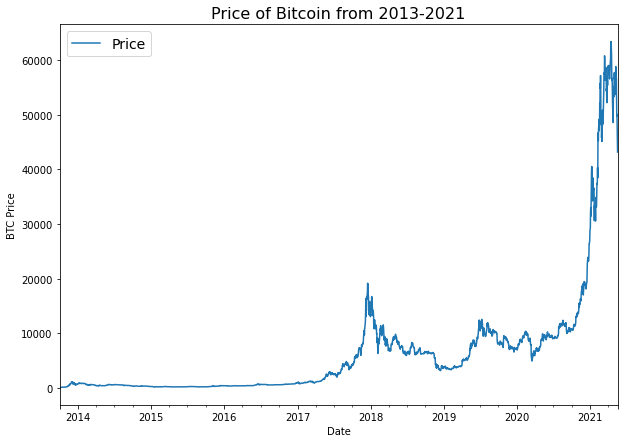

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 2013-2021", fontsize = 16)
plt.legend(fontsize =14);

# Train test set

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# correct way to split - time series split
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

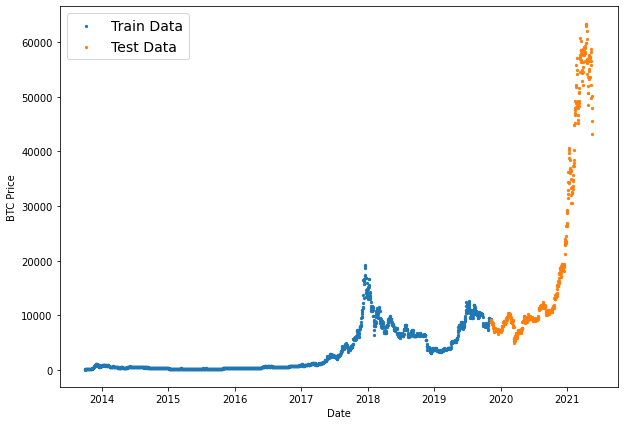

In [ ]:
# plot the splits
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s = 5, label = "Train Data")
plt.scatter(X_test, y_test, s = 5, label = "Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

In [ ]:
# Creating plotting function for future use

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

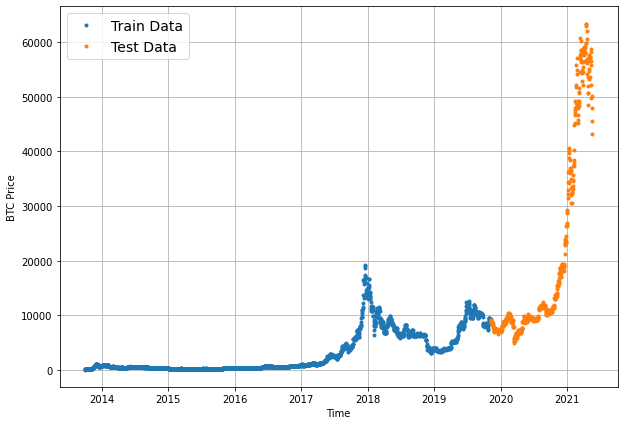

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train Data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test Data")

# Creating Models

### Naive model

## Model 0

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

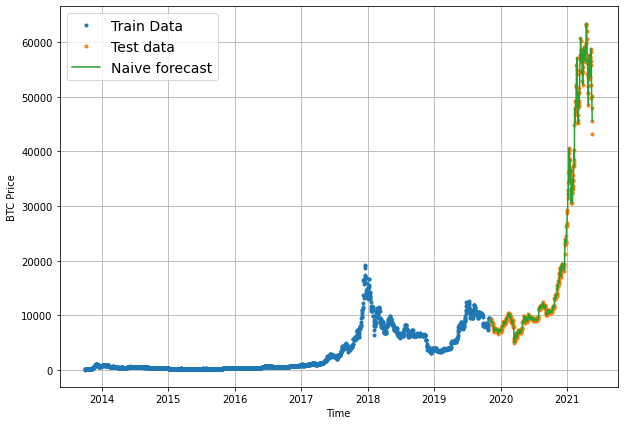

In [ ]:
#plot
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

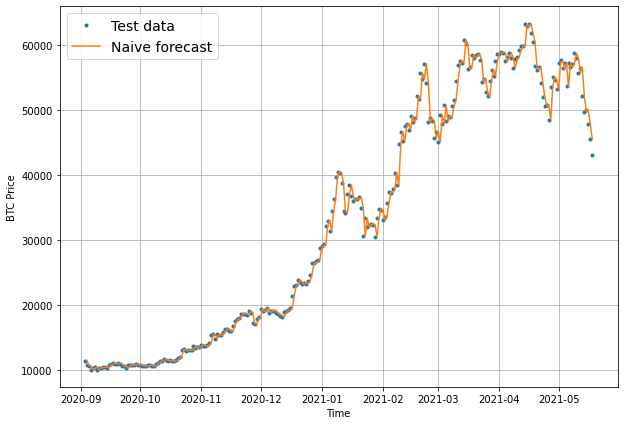

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating in time series Model

* MAE
* MSE
* RMSE
* MAPE/sMAPE
* MASE

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Windowing our dataset

In [ ]:
#Global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
#function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) + 1, axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
import numpy as np
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


### Turning windows into training and test sets

## Turning windows into training and test sets



In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels =  labels[:split_size]
  test_windows = windows[split_size:]
  test_labels =  labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
len(full_windows) * 0.8

2224.0

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

# Creating Models

### Model 1: window = 7, horizon = 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation ="linear")
], name = "model_1_dense")

# Compiling
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])
# fitting
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size =  128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2841.5718 - mae: 2841.5718 - mse: 20325842.0000  

18/18 [==============================] - 6s 80ms/step - loss: 2281.7041 - mae: 2281.7041 - mse: 14554058.0000 - val_loss: 3144.7485 - val_mae: 3144.7485 - val_mse: 19528574.0000
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 378.0269 - mae: 378.0269 - mse: 501825.3438

18/18 [==============================] - 1s 53ms/step - loss: 341.6603 - mae: 341.6603 - mse: 435733.7188 - val_loss: 1365.9562 - val_mae: 1365.9562 - val_mse: 4677091.5000
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 221.4310 - mae: 221.4310 - mse: 225509.9219

18/18 [==============================] - 1s 72ms/step - loss: 210.6777 - mae: 210.6777 - mse: 208884.5312 - val_loss: 989.1725 - val_mae: 989.1725 - val_mse: 3060635.7500
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 179.1400 - mae: 179.1400 - mse: 171072.0000

18/18 [==============================] - 1s 49ms/step - loss: 170.4575 - mae: 170.4575 - mse: 153834.9531 - val_loss: 944.0375 - val_mae: 944.0375 - val_mse: 2892274.2500
Epoch 5/100
18/18 [==============================] - 0s 17ms/step - loss: 166.9515 - mae: 166.9515 - mse: 152716.1875 - val_loss: 957.6377 - val_mae: 957.6377 - val_mse: 2866714.5000
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 159.6216 - mae: 159.6216 - mse: 128636.7266

18/18 [==============================] - 1s 53ms/step - loss: 162.3185 - mae: 162.3185 - mse: 142785.7031 - val_loss: 899.3006 - val_mae: 899.3006 - val_mse: 2739551.2500
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 165.7937 - mae: 165.7937 - mse: 154870.4688

18/18 [==============================] - 1s 52ms/step - loss: 157.8130 - mae: 157.8130 - mse: 137606.6406 - val_loss: 878.9920 - val_mae: 878.9920 - val_mse: 2572312.5000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 154.1372 - mae: 154.1372 - mse: 132451.2500

18/18 [==============================] - 1s 59ms/step - loss: 155.0357 - mae: 155.0357 - mse: 131922.3594 - val_loss: 856.5881 - val_mae: 856.5881 - val_mse: 2473230.5000
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 152.7041 - mae: 152.7041 - mse: 129109.8828 - val_loss: 874.6484 - val_mae: 874.6484 - val_mse: 2429489.7500
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 149.3833 - mae: 149.3833 - mse: 123987.5234

18/18 [==============================] - 1s 63ms/step - loss: 149.3833 - mae: 149.3833 - mse: 123987.5234 - val_loss: 818.5051 - val_mae: 818.5051 - val_mse: 2274003.2500
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 153.2850 - mae: 153.2850 - mse: 132902.5625

18/18 [==============================] - 1s 75ms/step - loss: 145.5024 - mae: 145.5024 - mse: 117866.2422 - val_loss: 804.5117 - val_mae: 804.5117 - val_mse: 2175703.5000
Epoch 12/100
18/18 [==============================] - 0s 14ms/step - loss: 142.3135 - mae: 142.3135 - mse: 113382.7656 - val_loss: 810.6111 - val_mae: 810.6111 - val_mse: 2126672.0000
Epoch 13/100
18/18 [==============================] - 0s 14ms/step - loss: 142.6771 - mae: 142.6771 - mse: 113423.8359 - val_loss: 832.1588 - val_mae: 832.1588 - val_mse: 2136437.7500
Epoch 14/100
11/18 [=================>............] - ETA: 0s - loss: 132.9745 - mae: 132.9745 - mse: 98966.2812

18/18 [==============================] - 1s 77ms/step - loss: 139.0432 - mae: 139.0432 - mse: 106726.6641 - val_loss: 786.5219 - val_mae: 786.5219 - val_mse: 1991317.8750
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 130.3956 - mae: 130.3956 - mse: 95776.6016 

18/18 [==============================] - 1s 87ms/step - loss: 136.0749 - mae: 136.0749 - mse: 103885.9766 - val_loss: 747.9601 - val_mae: 747.9601 - val_mse: 1867404.8750
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 132.4276 - mae: 132.4276 - mse: 98924.1797 - val_loss: 753.2552 - val_mae: 753.2552 - val_mse: 1846230.5000
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 132.3488 - mae: 132.3488 - mse: 98997.9453

18/18 [==============================] - 1s 57ms/step - loss: 131.5004 - mae: 131.5004 - mse: 97790.8125 - val_loss: 744.8328 - val_mae: 744.8328 - val_mse: 1799073.5000
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 134.7740 - mae: 134.7740 - mse: 102308.3594

18/18 [==============================] - 1s 59ms/step - loss: 130.8030 - mae: 130.8030 - mse: 96978.9062 - val_loss: 725.1486 - val_mae: 725.1486 - val_mse: 1725245.5000
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 131.7178 - mae: 131.7178 - mse: 105010.9219

18/18 [==============================] - 1s 56ms/step - loss: 127.2640 - mae: 127.2640 - mse: 92182.5938 - val_loss: 719.4996 - val_mae: 719.4996 - val_mse: 1688056.5000
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 128.1420 - mae: 128.1420 - mse: 94352.6328 

18/18 [==============================] - 1s 64ms/step - loss: 126.0866 - mae: 126.0866 - mse: 92098.9141 - val_loss: 714.6266 - val_mae: 714.6266 - val_mse: 1740934.2500
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 132.1796 - mae: 132.1796 - mse: 94674.7109 

18/18 [==============================] - 1s 60ms/step - loss: 129.2124 - mae: 129.2124 - mse: 94704.4062 - val_loss: 681.7356 - val_mae: 681.7356 - val_mse: 1567450.6250
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 175.7789 - mae: 175.7789 - mse: 176582.1875

18/18 [==============================] - 0s 29ms/step - loss: 123.6975 - mae: 123.6975 - mse: 88103.0078 - val_loss: 676.0070 - val_mae: 676.0070 - val_mse: 1533340.1250
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1439 - mae: 124.1439 - mse: 88450.9844 - val_loss: 685.4307 - val_mae: 685.4307 - val_mse: 1538959.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0941 - mae: 132.0941 - mse: 79073.9062

18/18 [==============================] - 0s 27ms/step - loss: 120.8004 - mae: 120.8004 - mse: 83766.3203 - val_loss: 675.9192 - val_mae: 675.9192 - val_mse: 1504310.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 135.4853 - mae: 135.4853 - mse: 76775.8594

18/18 [==============================] - 0s 28ms/step - loss: 119.3263 - mae: 119.3263 - mse: 82529.9062 - val_loss: 650.8288 - val_mae: 650.8288 - val_mse: 1471770.7500
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 124.2577 - mae: 124.2577 - mse: 84059.8047 - val_loss: 675.9068 - val_mae: 675.9068 - val_mse: 1557721.5000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 175.9742 - mae: 175.9742 - mse: 146082.9062

18/18 [==============================] - 0s 29ms/step - loss: 121.0905 - mae: 121.0905 - mse: 84400.0078 - val_loss: 643.1326 - val_mae: 643.1326 - val_mse: 1441002.7500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 112.2806 - mae: 112.2806 - mse: 66496.1719

18/18 [==============================] - 0s 27ms/step - loss: 116.7260 - mae: 116.7260 - mse: 79547.1328 - val_loss: 641.3295 - val_mae: 641.3295 - val_mse: 1394695.8750
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 110.2338 - mae: 110.2338 - mse: 76712.7656

18/18 [==============================] - 0s 29ms/step - loss: 118.2067 - mae: 118.2067 - mse: 80541.5859 - val_loss: 628.7875 - val_mae: 628.7875 - val_mse: 1363514.2500
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 128.2287 - mae: 128.2287 - mse: 87557.6328

18/18 [==============================] - 0s 27ms/step - loss: 118.3570 - mae: 118.3570 - mse: 79539.5234 - val_loss: 622.2944 - val_mae: 622.2944 - val_mse: 1354801.8750
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2174 - mae: 114.2174 - mse: 76791.5469 - val_loss: 650.1943 - val_mae: 650.1943 - val_mse: 1398316.7500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 116.6684 - mae: 116.6684 - mse: 79761.2969

18/18 [==============================] - 1s 38ms/step - loss: 117.4199 - mae: 117.4199 - mse: 80274.6250 - val_loss: 612.5175 - val_mae: 612.5175 - val_mse: 1316426.1250
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3450 - mae: 115.3450 - mse: 77932.3750 - val_loss: 625.3098 - val_mae: 625.3098 - val_mse: 1333263.0000
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9030 - mae: 116.9030 - mse: 84744.5781 

18/18 [==============================] - 1s 41ms/step - loss: 114.4267 - mae: 114.4267 - mse: 77678.3125 - val_loss: 603.9234 - val_mae: 603.9234 - val_mse: 1290452.1250
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4273 - mae: 111.4273 - mse: 75414.5469 - val_loss: 609.2564 - val_mae: 609.2564 - val_mse: 1304932.1250
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 112.3218 - mae: 112.3218 - mse: 76166.8984 

18/18 [==============================] - 1s 37ms/step - loss: 113.9215 - mae: 113.9215 - mse: 75657.9766 - val_loss: 598.3939 - val_mae: 598.3939 - val_mse: 1269777.0000
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 113.2151 - mae: 113.2151 - mse: 76640.5938 

18/18 [==============================] - 0s 28ms/step - loss: 113.2151 - mae: 113.2151 - mse: 76640.5938 - val_loss: 594.1689 - val_mae: 594.1689 - val_mse: 1259088.6250
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5890 - mae: 111.5890 - mse: 74503.2266 - val_loss: 608.4341 - val_mae: 608.4341 - val_mse: 1296912.1250
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3675 - mae: 114.3675 - mse: 74825.5078 - val_loss: 594.6649 - val_mae: 594.6649 - val_mse: 1258357.0000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.8300 - mae: 105.8300 - mse: 93816.6406

18/18 [==============================] - 1s 39ms/step - loss: 109.7306 - mae: 109.7306 - mse: 72615.7734 - val_loss: 591.0858 - val_mae: 591.0858 - val_mse: 1246868.7500
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4370 - mae: 111.4370 - mse: 73022.5312 - val_loss: 621.0292 - val_mae: 621.0292 - val_mse: 1317118.8750
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0154 - mae: 115.0154 - mse: 76526.3516 - val_loss: 609.0734 - val_mae: 609.0734 - val_mse: 1272324.5000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8266 - mae: 113.8266 - mse: 72893.7656 - val_loss: 627.5564 - val_mae: 627.5564 - val_mse: 1328395.5000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8882 - mae: 115.8882 - mse: 77030.6172 - val_loss: 591.2438 - val_mae: 591.2438 - val_mse: 1240687.1250
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7687 - mae: 108.7687 - m

18/18 [==============================] - 0s 27ms/step - loss: 112.0866 - mae: 112.0866 - mse: 73101.2812 - val_loss: 585.9604 - val_mae: 585.9604 - val_mse: 1226714.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8950 - mae: 112.8950 - mse: 74977.9297 - val_loss: 683.6014 - val_mae: 683.6014 - val_mse: 1444455.6250
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4504 - mae: 109.4504 - mse: 71449.2422 - val_loss: 590.9235 - val_mae: 590.9235 - val_mse: 1225954.1250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 154.7255 - mae: 154.7255 - mse: 114434.2578

18/18 [==============================] - 0s 29ms/step - loss: 110.9113 - mae: 110.9113 - mse: 71760.5859 - val_loss: 576.8130 - val_mae: 576.8130 - val_mse: 1202730.6250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1905 - mae: 109.1905 - mse: 70857.5859 - val_loss: 615.5135 - val_mae: 615.5135 - val_mse: 1287727.6250
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1909 - mae: 109.1909 - mse: 70806.6641 - val_loss: 598.4968 - val_mae: 598.4968 - val_mse: 1235848.0000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7992 - mae: 110.7992 - mse: 73110.8672 - val_loss: 577.5297 - val_mae: 577.5297 - val_mse: 1198845.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4222 - mae: 110.4222 - mse: 72109.5938 - val_loss: 640.7705 - val_mae: 640.7705 - val_mse: 1331143.7500
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7485 - mae: 114.7485 - m

18/18 [==============================] - 0s 27ms/step - loss: 111.1842 - mae: 111.1842 - mse: 73325.6406 - val_loss: 572.1926 - val_mae: 572.1926 - val_mse: 1185546.3750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7081 - mae: 109.7081 - mse: 71636.3750 - val_loss: 763.8484 - val_mae: 763.8484 - val_mse: 1706579.1250
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8108 - mae: 130.8108 - mse: 86970.3438 - val_loss: 691.7520 - val_mae: 691.7520 - val_mse: 1481721.8750
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9598 - mae: 115.9598 - mse: 74385.2500 - val_loss: 633.9919 - val_mae: 633.9919 - val_mse: 1326620.5000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0599 - mae: 109.0599 - mse: 70327.5156 - val_loss: 578.5963 - val_mae: 578.5963 - val_mse: 1202163.5000
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0953 - mae: 109.0953 - m

18/18 [==============================] - 0s 27ms/step - loss: 106.6224 - mae: 106.6224 - mse: 69029.3828 - val_loss: 568.8024 - val_mae: 568.8024 - val_mse: 1171141.3750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 105.1644 - mae: 105.1644 - mse: 67896.0859 - val_loss: 627.3135 - val_mae: 627.3135 - val_mse: 1301260.1250
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4739 - mae: 113.4739 - mse: 69119.0547 - val_loss: 696.4592 - val_mae: 696.4592 - val_mse: 1483708.1250
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1845 - mae: 123.1845 - mse: 79396.3359 - val_loss: 657.3510 - val_mae: 657.3510 - val_mse: 1378081.1250
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2929 - mae: 122.2929 - mse: 79255.2266 - val_loss: 577.2891 - val_mae: 577.2891 - val_mse: 1191102.5000
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8473 - mae: 108.8473 - m

18/18 [==============================] - 0s 27ms/step - loss: 106.4401 - mae: 106.4401 - mse: 68095.0781 - val_loss: 567.8501 - val_mae: 567.8501 - val_mse: 1164497.5000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9171 - mae: 105.9171 - mse: 69361.0234 - val_loss: 575.9356 - val_mae: 575.9356 - val_mse: 1185073.2500
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1483 - mae: 106.1483 - mse: 69324.7422 - val_loss: 576.9654 - val_mae: 576.9654 - val_mse: 1176374.5000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2817 - mae: 106.2817 - mse: 68280.2422 - val_loss: 569.8843 - val_mae: 569.8843 - val_mse: 1168697.1250
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6229 - mae: 113.6229 - mse: 74231.6562 - val_loss: 571.0629 - val_mae: 571.0629 - val_mse: 1172766.1250
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6063 - mae: 110.6063 - m

18/18 [==============================] - 0s 27ms/step - loss: 105.8318 - mae: 105.8318 - mse: 68101.0469 - val_loss: 566.0012 - val_mae: 566.0012 - val_mse: 1157765.1250
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7031 - mae: 105.7031 - mse: 67055.5000 - val_loss: 625.7344 - val_mae: 625.7344 - val_mse: 1279580.3750
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2625 - mae: 112.2625 - mse: 71488.0859 - val_loss: 657.0490 - val_mae: 657.0490 - val_mse: 1369611.5000
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5380 - mae: 107.5380 - mse: 68800.2031 - val_loss: 570.4370 - val_mae: 570.4370 - val_mse: 1170615.0000
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6538 - mae: 110.6538 - mse: 69040.2891 - val_loss: 588.9293 - val_mae: 588.9293 - val_mse: 1210886.7500
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2562 - mae: 112.2562 - m

In [ ]:
# Eval
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 612.4571 - mae: 612.4571 - mse: 1248845.3750


[612.4570922851562, 612.4570922851562, 1248845.375]

In [ ]:
# loading model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.0012 - mae: 566.0012 - mse: 1157764.7500


[566.0011596679688, 566.0011596679688, 1157764.75]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make preds
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8860.644, 8803.733, 9062.801, 8778.278, 8761.762, 8772.484,
        8681.05 , 8540.179, 8481.956, 8546.333], dtype=float32)>)

In [ ]:
# Eval preds
model_1_res = evaluate_preds(y_true = tf.squeeze(test_labels),
                                                 y_pred = model_1_preds)
model_1_res

{'mae': 566.00116,
 'mse': 1157764.9,
 'rmse': 1075.9949,
 'mape': 2.5279796,
 'mase': 0.9943073}

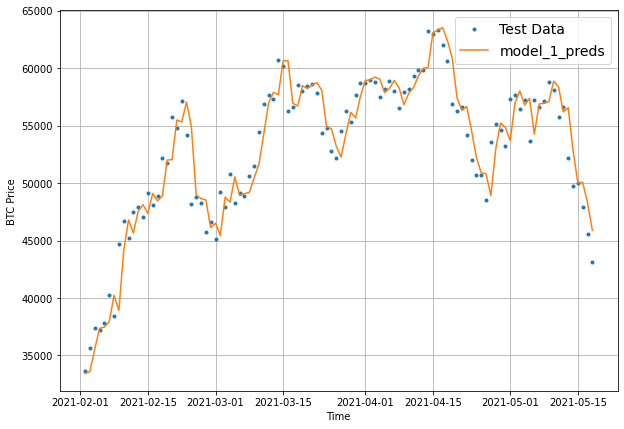

In [ ]:
# Plot model 1
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Train and test
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                  labels = full_labels,
                                                                  test_split = 0.2)

### Model 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation ="linear")
], name = "model_2_dense")

# Compiling
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])
# fitting
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 0,
            batch_size =  128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1340.5868 - mae: 1340.5868 - mse: 5801179.5000


[1340.5867919921875, 1340.5867919921875, 5801179.5]

In [ ]:
# Loading the best perfoming instance into the model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1244.0457 - mae: 1244.0457 - mse: 5357088.0000


[1244.045654296875, 1244.045654296875, 5357088.0]

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 3ms/step


In [ ]:
# making eval fun work for larger horizons
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  # for diff horizon
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 1244.0458,
 'mse': 5357087.5,
 'rmse': 1427.1691,
 'mape': 5.5514965,
 'mase': 2.2137098}

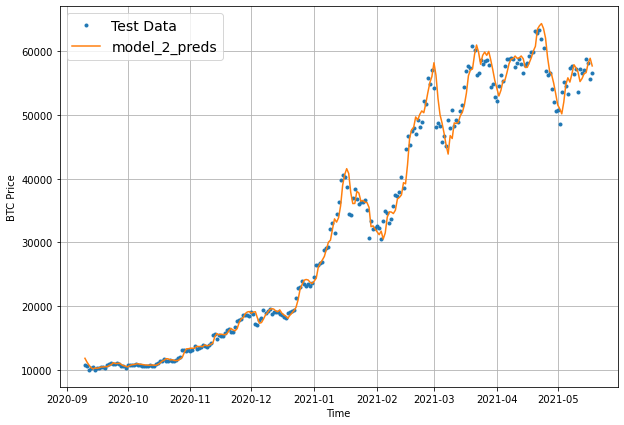

In [ ]:
#Plot model 2
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 format = ".",
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_mean(model_2_preds, axis = 1),
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

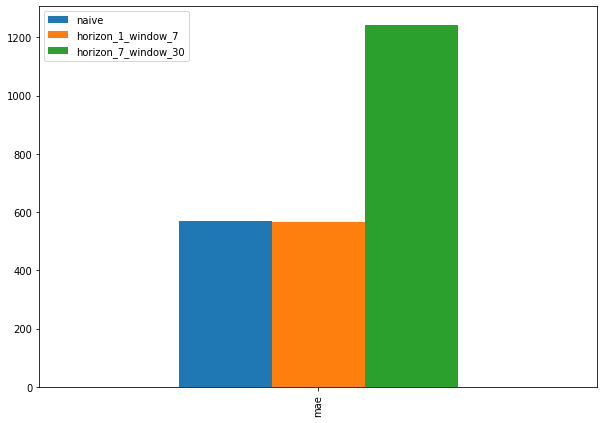

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_res["mae"],
              "horizon_7_window_30": model_2_results["mae"]}, index = ["mae"]).plot(figsize = (10,7), kind = "bar");

### Conv 1D model

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

## Train-Test sets

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# Reshaping data to fit in Conv1D layer

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layers = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [ ]:
x.shape


TensorShape([7])

In [ ]:
expand_dims_layers(x).shape
expand_dims_layers(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

## Create Conv1D layer

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation = "relu" ),
    layers.Dense(HORIZON)
],  name = "model_4_1D")


model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows, train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1269.8458  

18/18 [==============================] - 6s 48ms/step - loss: 1186.4027 - val_loss: 1893.0331
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 315.2103

18/18 [==============================] - 1s 39ms/step - loss: 312.8267 - val_loss: 1664.9564
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 202.0864

18/18 [==============================] - 1s 37ms/step - loss: 202.0864 - val_loss: 1165.4661
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 181.5643

18/18 [==============================] - 1s 37ms/step - loss: 179.7454 - val_loss: 999.8001
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 176.1056 - val_loss: 1001.1810
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 172.4531

18/18 [==============================] - 1s 36ms/step - loss: 172.4531 - val_loss: 960.1289
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 169.9957

18/18 [==============================] - 1s 42ms/step - loss: 169.9957 - val_loss: 942.0026
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 163.7327

18/18 [==============================] - 1s 71ms/step - loss: 166.5110 - val_loss: 933.3093
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 164.6980 - val_loss: 964.9873
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 158.0240

18/18 [==============================] - 1s 49ms/step - loss: 162.5099 - val_loss: 899.0797
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 159.4978

18/18 [==============================] - 1s 38ms/step - loss: 159.2193 - val_loss: 879.5193
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 156.5123 - val_loss: 940.9238
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 155.4370

18/18 [==============================] - 1s 37ms/step - loss: 154.9511 - val_loss: 873.1116
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 151.1842 - val_loss: 874.9969
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 150.1201 - val_loss: 876.4102
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 146.4263

18/18 [==============================] - 1s 36ms/step - loss: 146.4263 - val_loss: 831.7955
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 142.5715

18/18 [==============================] - 1s 37ms/step - loss: 144.4884 - val_loss: 808.7264
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 141.3549 - val_loss: 815.5231
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 137.8721

18/18 [==============================] - 1s 36ms/step - loss: 138.2053 - val_loss: 797.4401
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 139.2476

18/18 [==============================] - 1s 36ms/step - loss: 139.2476 - val_loss: 791.2050
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 137.0294

18/18 [==============================] - 1s 37ms/step - loss: 137.5904 - val_loss: 739.5886
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 135.9917

18/18 [==============================] - 1s 36ms/step - loss: 135.9917 - val_loss: 729.4485
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 131.5576

18/18 [==============================] - 1s 55ms/step - loss: 131.5576 - val_loss: 722.6551
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 134.9184

18/18 [==============================] - 1s 40ms/step - loss: 133.4050 - val_loss: 722.0060
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 132.5636

18/18 [==============================] - 1s 37ms/step - loss: 132.5636 - val_loss: 703.3380
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.5961 - val_loss: 713.8855
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 127.2092

18/18 [==============================] - 1s 38ms/step - loss: 127.2092 - val_loss: 693.8887
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 124.5941

18/18 [==============================] - 1s 37ms/step - loss: 124.5941 - val_loss: 676.6644
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0996 - val_loss: 688.7412
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 126.7919 - val_loss: 769.1885
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 138.4290 - val_loss: 810.8820
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 136.2323

18/18 [==============================] - 1s 49ms/step - loss: 136.2323 - val_loss: 668.3837
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 132.3458

18/18 [==============================] - 1s 52ms/step - loss: 129.7711 - val_loss: 667.0239
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 126.8043

18/18 [==============================] - 1s 46ms/step - loss: 120.9278 - val_loss: 647.9471
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 118.9782

18/18 [==============================] - 1s 36ms/step - loss: 118.7402 - val_loss: 639.5839
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 122.9238 - val_loss: 696.7701
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 119.2153

18/18 [==============================] - 1s 37ms/step - loss: 119.2153 - val_loss: 634.7574
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 118.2405

18/18 [==============================] - 1s 53ms/step - loss: 117.9696 - val_loss: 631.3264
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6102 - val_loss: 650.8625
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8023 - val_loss: 639.3522
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 117.2934

18/18 [==============================] - 1s 38ms/step - loss: 117.2934 - val_loss: 617.4385
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3063

18/18 [==============================] - 1s 37ms/step - loss: 119.1791 - val_loss: 614.5514
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2330 - val_loss: 622.2151
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0303 - val_loss: 630.9911
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0512 - val_loss: 617.9268
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9739 - val_loss: 617.0681
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8472 - val_loss: 651.6744
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 113.3914

18/18 [==============================] - 1s 36ms/step - loss: 113.3914 - val_loss: 608.4485
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1871 - val_loss: 638.9835
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0575 - val_loss: 676.2143
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9799 - val_loss: 635.3262
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1492 - val_loss: 635.1833
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5148 - val_loss: 610.7680
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8919 - val_loss: 669.4310
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 115.2006

18/18 [==============================] - 1s 37ms/step - loss: 115.2006 - val_loss: 595.5186
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7341 - val_loss: 777.6857
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5479 - val_loss: 627.5447
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 120.6445 - val_loss: 628.7038
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4317 - val_loss: 597.0834
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6138 - val_loss: 596.5500
Epoch 61/100
16/18 [=========================>....] - ETA: 0s - loss: 111.5410

18/18 [==============================] - 1s 64ms/step - loss: 110.6519 - val_loss: 590.7925
Epoch 62/100
17/18 [===========================>..] - ETA: 0s - loss: 109.9839

18/18 [==============================] - 1s 65ms/step - loss: 109.7075 - val_loss: 585.4584
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0353 - val_loss: 614.6492
Epoch 64/100
18/18 [==============================] - 0s 15ms/step - loss: 113.1855 - val_loss: 658.4300
Epoch 65/100
18/18 [==============================] - 0s 15ms/step - loss: 114.8933 - val_loss: 589.0383
Epoch 66/100
18/18 [==============================] - 0s 12ms/step - loss: 111.3460 - val_loss: 587.8133
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 108.4869 - val_loss: 637.9094
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2084 - val_loss: 724.5101
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 126.3239 - val_loss: 679.5115
Epoch 70/100
13/18 [====================>.........] - ETA: 0s - loss: 116.6620

18/18 [==============================] - 1s 52ms/step - loss: 117.1768 - val_loss: 579.9788
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1645 - val_loss: 589.9527
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 110.1699

18/18 [==============================] - 1s 49ms/step - loss: 110.0957 - val_loss: 578.2144
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0774 - val_loss: 606.2245
Epoch 74/100
16/18 [=========================>....] - ETA: 0s - loss: 109.3859

18/18 [==============================] - 1s 36ms/step - loss: 109.6689 - val_loss: 577.1975
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7143 - val_loss: 601.3829
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 110.2770

18/18 [==============================] - 1s 36ms/step - loss: 110.0664 - val_loss: 574.5993
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4314 - val_loss: 577.2739
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 109.9568

18/18 [==============================] - 1s 53ms/step - loss: 109.0202 - val_loss: 574.5699
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8424 - val_loss: 596.2291
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5473 - val_loss: 577.2368
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7576 - val_loss: 576.5963
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 113.8236

18/18 [==============================] - 1s 37ms/step - loss: 113.8236 - val_loss: 572.7977
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8533 - val_loss: 672.2198
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8610 - val_loss: 581.2977
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9542 - val_loss: 577.8069
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2405 - val_loss: 607.1849
Epoch 87/100
15/18 [========================>.....] - ETA: 0s - loss: 108.8745

18/18 [==============================] - 1s 36ms/step - loss: 109.6470 - val_loss: 569.6613
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7699 - val_loss: 603.8412
Epoch 89/100
18/18 [==============================] - ETA: 0s - loss: 109.9004

18/18 [==============================] - 1s 38ms/step - loss: 109.9004 - val_loss: 569.3906
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0258 - val_loss: 693.3569
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5264 - val_loss: 594.1089
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4621 - val_loss: 572.7429
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6252 - val_loss: 609.3470
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4382 - val_loss: 580.3224
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2873 - val_loss: 572.4028
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0158 - val_loss: 628.0858
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2724 - val_loss: 636.8037
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 11

In [ ]:
model_4.summary()

Model: "model_4_1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 607.1452


607.1452026367188

In [ ]:
# load back best performing instance
model_4 = tf.keras.models.load_model("model_experiments/model_4_1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.3906


569.3905639648438

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.486, 8798.908, 9004.152, 8798.677, 8750.23 , 8739.281,
       8684.846, 8547.913, 8466.437, 8523.297], dtype=float32)>

In [ ]:
# Results
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_4_preds)
model_4_results

{'mae': 569.3905,
 'mse': 1184985.5,
 'rmse': 1088.5703,
 'mape': 2.551426,
 'mase': 1.0002614}

## Model 5 : RNN

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
# Functional API
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = output, name = "model_5_LSTM")

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 146ms/step - loss: 2373.9863 - val_loss: 8945.7803
Epoch 2/100
18/18 [==============================] - 2s 117ms/step - loss: 744.6711 - val_loss: 1139.0789
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 249.7504 - val_loss: 1278.0128
Epoch 4/100
18/18 [==============================] - 2s 96ms/step - loss: 201.8114 - val_loss: 1076.6560
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 191.9706 - val_loss: 1081.0015
Epoch 6/100
18/18 [==============================] - 2s 115ms/step - loss: 192.4640 - val_loss: 1066.8269
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 187.9444 - val_loss: 1068.1873
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 185.8500 - val_loss: 1069.3035
Epoch 9/100
18/18 [==============================] - 2s 96ms/step - loss: 183.9287 - val_loss: 1056.4580
Epoch 10/100
18/18 [==============================] - 2

In [ ]:
# eval
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 592.0872


592.0872192382812

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8953.573, 8818.727, 8969.929, 8782.837, 8744.813], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 592.08716,
 'mse': 1250727.8,
 'rmse': 1118.3594,
 'mape': 2.656346,
 'mase': 1.0401331}

## Multivariate time series

---



In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

In [ ]:
# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Adding in block_reward values as a feature to our dataframe
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days , -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days: , -1] = block_reward_4
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<AxesSubplot:xlabel='Date'>

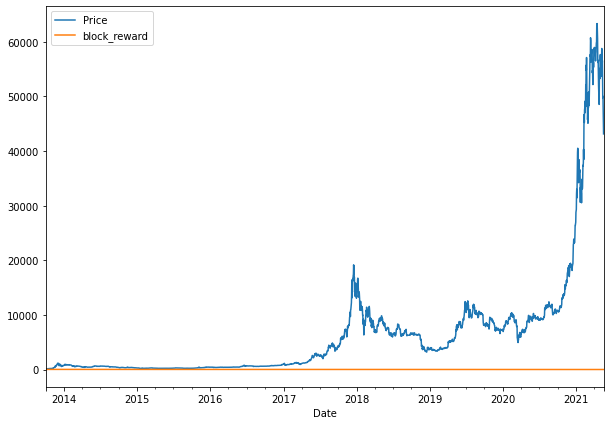

In [ ]:
bitcoin_prices_block.plot(figsize= (10, 7));

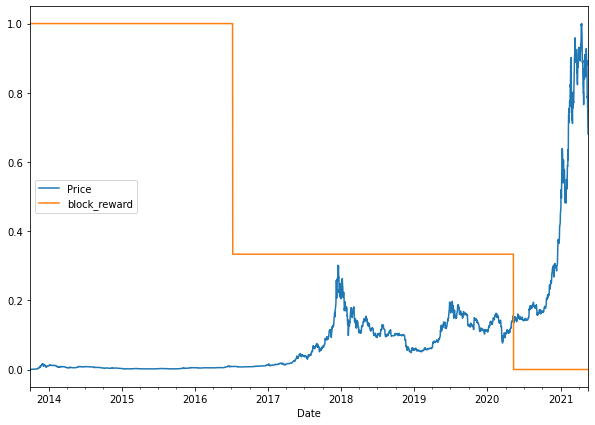

In [ ]:
# they are at diff scales
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                  columns = bitcoin_prices_block.columns,
                                                  index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize= (10, 7));

## Making a windowed Dataset with pandas

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i + 1)
bitcoin_prices_windowed.head(10)

In [ ]:
# Create X windows and Y horizon features
X = bitcoin_prices_windowed.dropna().drop("Price, axis").astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

In [ ]:
# Creating train and test set
split_size = int(len(X)* 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)